<a href="https://colab.research.google.com/github/MIA1kl/MlColorizingImages/blob/main/ColoredMlProjectMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:

upl = files.upload()
names = list(upl.keys())


#The uploaded image will be in RGB format. To convert to Lab space, we use the processed_image() function
def processed_image(img): 
  image = img.resize( (256, 256), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  # X-light, Y-color
  X, Y = lab[:,:,0], lab[:,:,1:]
  # X from 0 to 100
  Y /= 128    #output from -1 to 1
  X = X.reshape(1, size[0], size[1], 1) # batch, image sizes, one color channel
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size


for i in range(len(names)):

  img = Image.open(BytesIO(upl[names[i]]))

  X, Y, size = processed_image(img)

  model = Sequential()
  model.add(InputLayer(input_shape=(None, None, 1))) # input image with size and 1 color channel
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) #first convolutional layer with 64 channels with 3x3 filter
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)) # scanning step=2, so the output will be twice less
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
  model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2))) # increases the feature map by 2 times
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(2, (3, 3), activation='tanh', padding='same')) # activation function hyperbolic tangent
  model.add(UpSampling2D((2, 2)))

  model.compile(optimizer='adam', loss='mse')
  model.fit(x=X, y=Y, batch_size=i, epochs=50) # input X, output Y, 

  






Saving photo103.jpg to photo103 (1).jpg
Saving photo102.jpg to photo102 (1).jpg
Saving photo101.jpg to photo101 (2).jpg
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0475
Epoch 2/50
1/1 [==============================] - 1s 910ms/step - loss: 0.9029
Epoch 3/50
1/1 [==============================] - 1s 903ms/step - loss: 0.4785
Epoch 4/50
1/1 [==============================] - 1s 903ms/step - loss: 0.0250
Epoch 5/50
1/1 [==============================] - 1s 899ms/step - loss: 0.0246
Epoch 6/50
1/1 [==============================] - 1s 915ms/step - loss: 0.0244
Epoch 7/50
1/1 [==============================] - 1s 909ms/step - loss: 0.0245
Epoch 8/50
1/1 [==============================] - 1s 905ms/step - loss: 0.0242
Epoch 9/50
1/1 [==============================] - 1s 920ms/step - loss: 0.0238
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 0.0235
Epoch 11/50
1/1 [==============================] - 2s 2s/step - loss: 0.0234
Epoch 12/50
1/1 [=

Saving photo105.jpg to photo105 (1).jpg
1/1 [==============================] - 0s 272ms/step


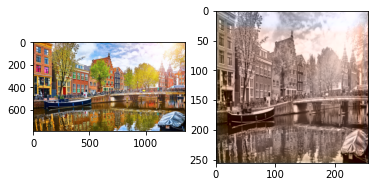

In [ ]:

upl = files.upload()
names = list(upl.keys())

for i in range(len(names)):

  img = Image.open(BytesIO(upl[names[i]]))
  X, Y, size = processed_image(img)
  output = model.predict(X)

  output *= 128 #we multiply output by 128, because Y was from -1 to 1
  min_vals, max_vals = -128, 127
  ab = np.clip(output[0], min_vals, max_vals) #create borders for our output
  
  cur = np.zeros((size[0], size[1], 3))
  cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
  cur[:,:,1:] = ab
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.subplot(1, 2, 2)
  plt.imshow(lab2rgb(cur))

